# Hope
## Data clustering using KMeans
### Data clustering to find out which learning style (Auditory, Visual, Kinesthetic, Read/Write) the user falls into, All data was collected anonymously by us, using google forms

#### Importing the data

In [1]:
import pandas as pd

In [2]:
en = pd.read_csv('F:\Clustering\Data\Test - Form responses 1.csv')
ar = pd.read_csv('F:\Clustering\Data\Ada Lovelace Hack _ Team 18_exported_on_Fri Oct 16 2020 18_41_43 GMT+0530 (IST) - Form Responses 1.csv')

### Data Preprocessing
#### Dropping extra unusable columns

In [3]:
en = en.drop('Do you give consent to your data being used and stored anonymously to train', axis = 1)
en = en.drop('Timestamp', axis = 1)
ar = ar.drop('Timestamp', axis = 1)

### Exploring dataset

In [4]:
print(f'english set shape = {en.shape}, arabic set shape = {ar.shape}')

english set shape = (72, 16), arabic set shape = (315, 16)


In [5]:
en.head()

,I have a problem with my heart. I would prefer that the doctor,I have finished a competition or test and I would like some feedback. I would like to have feedback,When I am learning I:,I want to learn how to play a new board game or card game. I would:,I need to find the way to a shop that a friend has recommended. I would:,"A website has a video showing how to make a special graph or chart. There is a person speaking, some lists and words describing what to do and some diagrams. I would learn most from:",I want to learn to do something new on a computer. I would:,I want to save more money and to decide between a range of options. I would:,"When choosing a career or area of study, these are important for me:",I want to find out about a house or an apartment. Before visiting it I would want:,I prefer a presenter or a teacher who uses:,I want to learn how to take better photos. I would:,When learning from the Internet I like:,I want to learn about a new project. I would ask for:,I want to find out more about a tour that I am going on. I would:,I want to assemble a wooden table that came in parts (kitset). I would learn best from:
0,"showed me a diagram of what was wrong., descri...",using examples from what I have done.,"use examples and applications., like to talk t...",listen to somebody explaining it and ask quest...,find out where the shop is in relation to some...,"watching the actions., seeing the diagrams.","start using it and learn by trial and error., ...",consider examples of each option using my fina...,"Working with designs, maps or charts., Communi...","a discussion with the owner., a plan showing t...","demonstrations, models or practical sessions.",use examples of good and poor photos showing h...,"videos showing how to do or make things., audi...","an opportunity to discuss the project., exampl...",use a map and see where the places are.,watching a video of a person assembling a simi...
1,gave me something to read to explain what was ...,from somebody who talks it through with me.,"read books, articles and handouts., like to ta...","read the instructions., listen to somebody exp...",write down the street directions I need to rem...,reading the words.,read the written instructions that came with t...,read a print brochure that describes the optio...,Using words well in written communications.,a plan showing the rooms and a map of the area.,"question and answer, talk, group discussion, o...",use the written instructions about what to do.,"interesting written descriptions, lists and ex...",an opportunity to discuss the project.,talk with the person who planned the tour or o...,written instructions that came with the parts ...
2,used a plastic model to show me what was wrong...,"using examples from what I have done., from so...","use examples and applications., like to talk t...","read the instructions., listen to somebody exp...",find out where the shop is in relation to some...,"listening., watching the actions., seeing the ...",talk with people who know about the program.,talk with an expert about the options.,"Communicating with others through discussion.,...","to view a video of the property., a discussion...","demonstrations, models or practical sessions.,...",ask questions and talk about the camera and it...,videos showing how to do or make things.,examples where the project has been used succe...,talk with the person who planned the tour or o...,watching a video of a person assembling a simi...
3,described what was wrong,using examples from what I have done.,"use examples and applications., read books, ar...",listen to somebody explaining it and ask quest...,find out where the shop is in relation to some...,"watching the actions., reading the words.",follow the diagrams in a book.,read a print brochure that describes the optio...,Applying my knowledge in real situations.,a plan showing the rooms and a map of the area.,"question and answer, talk, group discussion, o...",use diagrams showing the camera and wha

#### One-hot encoding

In [6]:
en = pd.get_dummies(en)
ar = pd.get_dummies(ar)

In [7]:
en.head()

,I have a problem with my heart. I would prefer that the doctor_described what was wrong,I have a problem with my heart. I would prefer that the doctor_gave me something to read to explain what was wrong.,"I have a problem with my heart. I would prefer that the doctor_gave me something to read to explain what was wrong., described what was wrong","I have a problem with my heart. I would prefer that the doctor_gave me something to read to explain what was wrong., showed me a diagram of what was wrong.","I have a problem with my heart. I would prefer that the doctor_gave me something to read to explain what was wrong., showed me a diagram of what was wrong., described what was wrong",I have a problem with my heart. I would prefer that the doctor_showed me a diagram of what was wrong.,"I have a problem with my heart. I would prefer that the doctor_showed me a diagram of what was wrong., described what was wrong",I have a problem with my heart. I would prefer that the doctor_used a plastic model to show me what was wrong.,"I have a problem with my heart. I would prefer that the doctor_used a plastic model to show me what was wrong., described what was wrong","I have a problem with my heart. I would prefer that the doctor_used a plastic model to show me what was wrong., gave me something to read to explain what was wrong.",...,"I want to assemble a wooden table that came in parts (kitset). I would learn best from:_advice from someone who has done it before., watching a video of a person assembling a similar table.","I want to assemble a wooden table that came in parts (kitset). I would learn best from:_advice from someone who has done it before., watching a video of a person assembling a similar table., diagrams showing each stage of the assembly., written instructions that came with the parts for the table.","I want to assemble a wooden table that came in parts (kitset). I would learn best from:_advice from someone who has done it before., watching a video of a person assembling a similar table., written instructions that came with the parts for the table.","I want to assemble a wooden table that came in parts (kitset). I would learn best from:_advice from someone who has done it before., written instructions that came with the parts for the table.",I want to assemble a wooden table that came in parts (kitset). I would learn best from:_diagrams showing each stage of the assembly.,"I want to assemble a wooden table that came in parts (kitset). I would learn best from:_diagrams showing each stage of the assembly., written instructions that came with the parts for the table.",I want to assemble a wooden table that came in parts (kitset). I would learn best from:_watching a video of a person assembling a similar table.,"I want to assemble a wooden table that came in parts (kitset). I would learn best from:_watching a video of a person assembling a similar table., diagrams showing each stage of the assembly.","I want to assemble a wooden table that came in parts (kitset). I would learn best from:_watching a video of a person assembling a similar table., written instructions that came with the parts for the table.",I want to assemble a wooden table that came in parts (kitset). I would learn best from:_written instructions that came with the parts for the table.
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
print(f'english set shape = {en.shape}, arabic set shape = {ar.shape}')

english set shape = (72, 209), arabic set shape = (315, 283)


#### Due to lack of data, we do not have every possible combination of multiple-choice answers, so one-hot encoding the two dataset gave different quantities of columns
#### For now, we will only use the english dataset 'en'

In [9]:
#full_set = pd.concat([en,ar],axis=0)
#full_set_v = pd.concat([en,ar], axis=1)

#### Dimensioality reduction using PCA, reduce number of features to 10 through principal component analysis

In [10]:
from sklearn.decomposition import PCA

In [11]:
random_state = 200

In [12]:
pca = PCA(n_components = 10, random_state=random_state)

In [13]:
data = pca.fit_transform(ar)

#### Visualizing heatmap of generated components

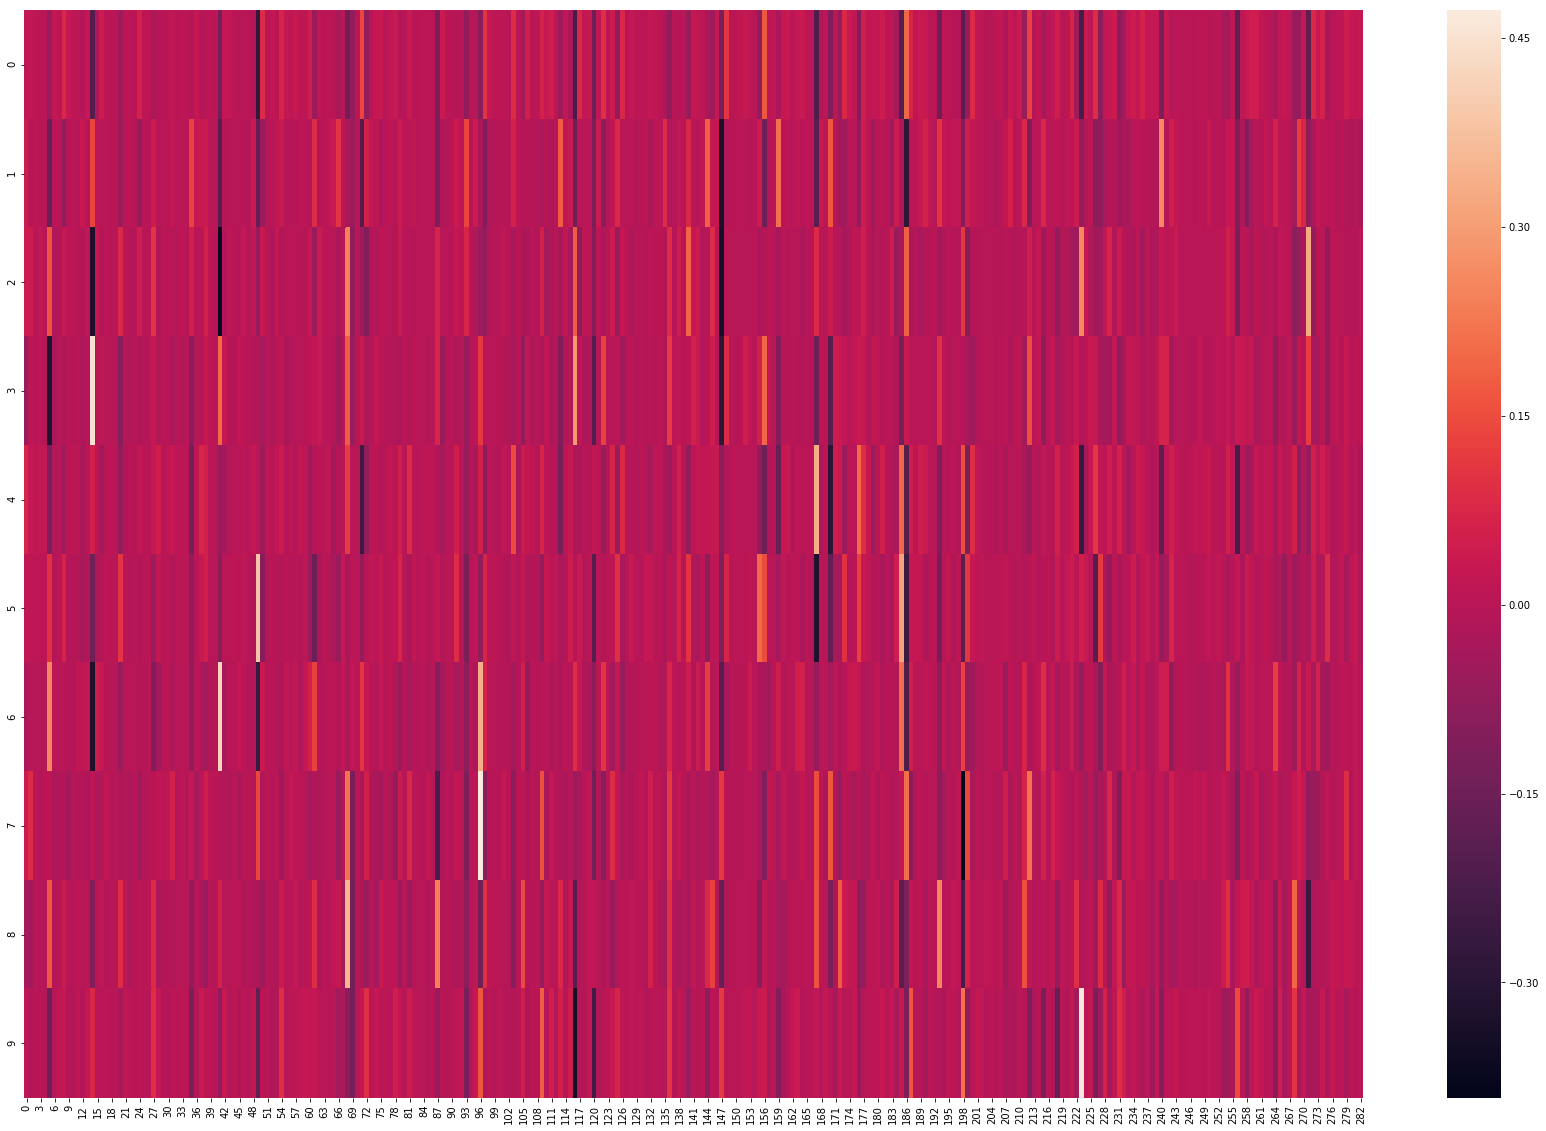

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
m = pd.DataFrame(pca.components_)
plt.figure(figsize=(30,20))
sns.heatmap(m,cmap='rocket')

#### Data after PCA

In [15]:
data = pd.DataFrame(data)

In [16]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.414782,0.396654,-0.179127,0.234736,0.545878,0.458156,0.273252,0.431484,-0.201311,0.344079
1,-0.151248,0.390790,0.422994,-0.026948,0.796358,0.032054,-0.297843,-0.177240,0.086110,-0.589813
2,1.472223,0.174943,-0.222863,0.551723,0.079343,-0.019623,-0.715319,-0.030088,-0.186793,-0.108342
3,1.217887,0.721407,-0.005074,-0.228097,0.840372,0.228874,-0.142430,-0.162431,-0.071880,0.086340
4,0.353747,0.351427,0.748576,0.009666,-0.082416,1.111925,-0.623333,0.442311,-0.330338,0.299036


#### Clustering using KMeans
Kmeans works by clustering your data into K number of similar groups, in this instance, we already know how many groups we need, and that's 4, one for each learning style

In [17]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters = 4, n_jobs = -1, random_state=random_state)

In [19]:
km.fit(data)
predictions = km.predict(data)

#### Centroids are the predicted centers of each cluster

In [20]:
centroids = km.cluster_centers_
print(centroids)

[[-0.64998879  0.94221415 -0.08655998 -0.04867305 -0.42468752 -0.16981411
  -0.05413615  0.16757498  0.09394535 -0.12591542]
 [ 0.87633514 -0.40490925 -0.15506522  0.0901184  -0.41436691  0.03794674
   0.13885617 -0.06646651  0.07934827 -0.03228961]
 [ 0.8050403   0.21064248  0.14547645 -0.06120392  0.38291257 -0.08057561
  -0.14671315  0.08235227 -0.13097533  0.07873708]
 [-0.96352046 -0.29468778  0.03757342  0.00445902  0.19167766  0.11137341
   0.03816637 -0.09122352  0.00235289  0.01864545]]


#### At this point, clustering is done, it may not give a good result due to small amount of data
#### Further dimensionality reduction for data visualization

In [21]:
pca = PCA(n_components = 4, random_state=random_state)
data = pca.fit_transform(data)
centroids = pca.transform(centroids)

#### Visualizing data, predicted clusters and centroid
#### data points are scattered around an X,Y axis, each color points to a cluster (or a group / learning style), and centroids are the big dark dots

In [22]:
dataframe = pd.DataFrame(data)

In [23]:
x, y, z, a = dataframe[0], dataframe[1], dataframe[2], dataframe[3]

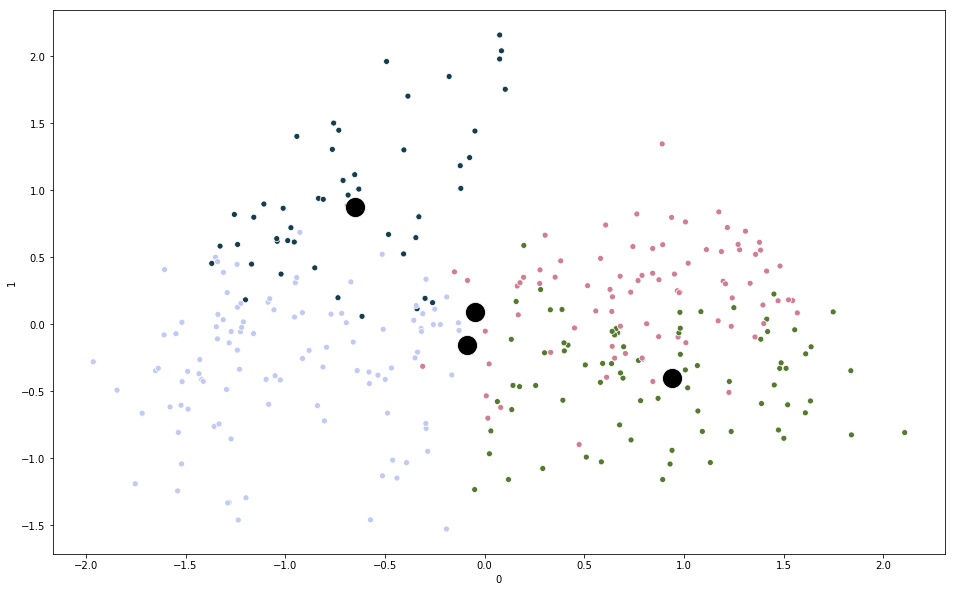

In [24]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=x, y=y,
    hue = predictions,
    palette=sns.color_palette("cubehelix", 4)
)
sns.scatterplot(
    x=centroids[0], y=centroids[1], s=400, color='black'
)
plt.legend().remove()
plt.show()


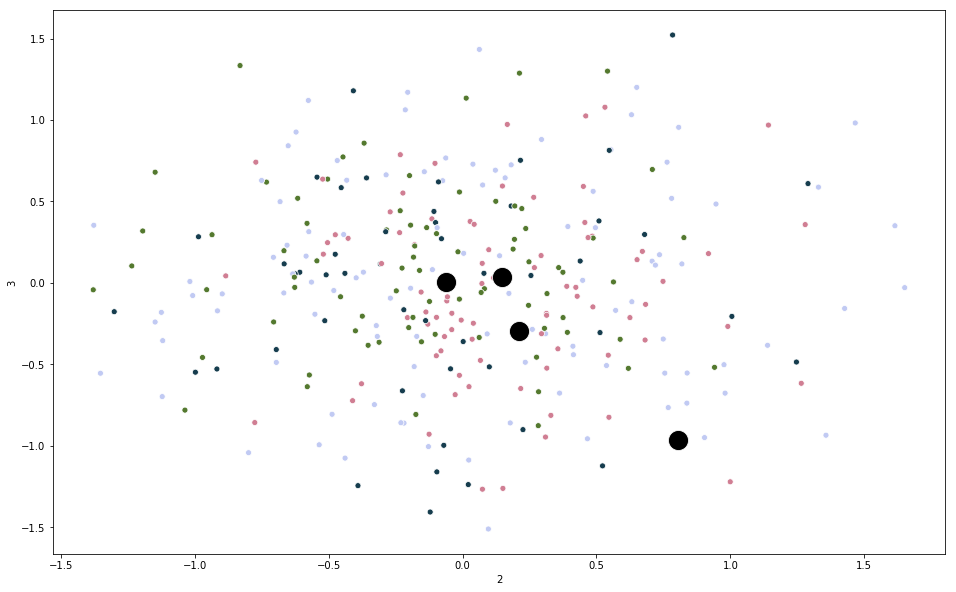

In [25]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=z, y=a,
    hue = predictions,
    palette=sns.color_palette("cubehelix", 4)
)
sns.scatterplot(
    x=centroids[2], y=centroids[3], s=400, color='black'
)
plt.legend().remove()
plt.show()

#### as we can see, the centroids are not really in the center of each color group, this is because our model did not train very well because of the lack of data
#### end